In [20]:
import numpy as np
import matplotlib.pyplot as plt

## Execution Time Tests

In [23]:
buff_size = np.array([75, 150, 222, 303, 372, 445, 519, 597, 669, 746, 815, 896, 974])
buff_time = np.array([0.0032, 0.0067, 0.0102, 0.0139, 0.0178, 0.0217, 0.0259, 0.0302, 0.0345, 0.0390, 0.0438, 0.0487, 0.0537])
enc_time = np.array([0.0040, 0.0102, 0.0167, 0.0268, 0.0390, 0.0502, 0.0662, 0.0843, 0.1004, 0.1223, 0.1415, 0.1673, 0.1952])
comp_time = np.array([0.0020, 0.0064, 0.0110, 0.0191, 0.0296, 0.0379, 0.0535, 0.0685, 0.0897, 0.0916, 0.1165, 0.1445, 0.1467])
dec_time = np.array([ 27, 
 29, 
 37 ,
 48 ,
 52,
 79 ,
 88 ,
 102,
 115,
 128,
 141,
 158,
 166])

Text(0, 0.5, 'Execution Time [us]')

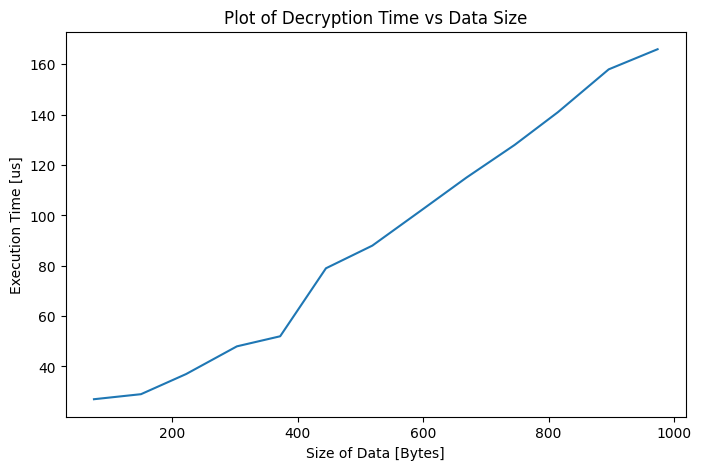

In [24]:
plt.figure(figsize=(8,5))
plt.plot(buff_size, dec_time)
plt.title("Plot of Decryption Time vs Data Size")
plt.xlabel("Size of Data [Bytes]")
plt.ylabel("Execution Time [us]")

Text(0, 0.5, 'Execution Time [s]')

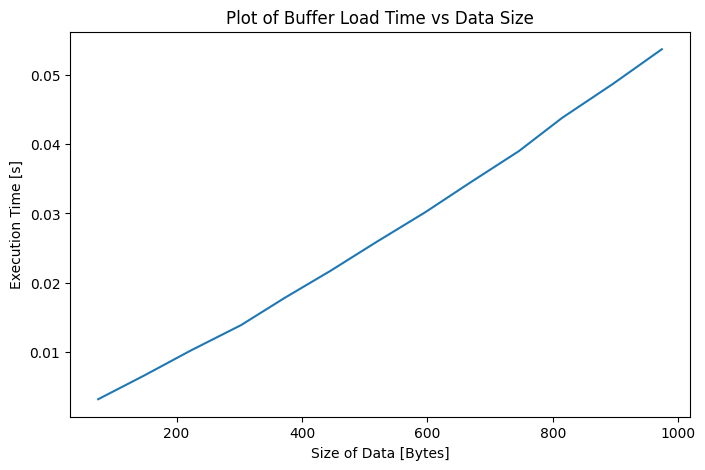

In [23]:
plt.figure(figsize=(8,5))
plt.plot(buff_size, buff_time)
plt.title("Plot of Buffer Load Time vs Data Size")
plt.xlabel("Size of Data [Bytes]")
plt.ylabel("Execution Time [s]")

Text(0, 0.5, 'Execution Time [s]')

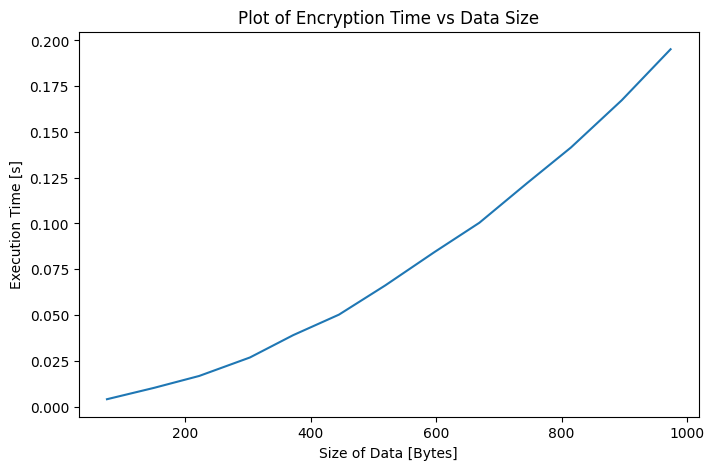

In [26]:
plt.figure(figsize=(8,5))
plt.plot(buff_size, enc_time)
plt.title("Plot of Encryption Time vs Data Size")
plt.xlabel("Size of Data [Bytes]")
plt.ylabel("Execution Time [s]")

Text(0, 0.5, 'Execution Time [s]')

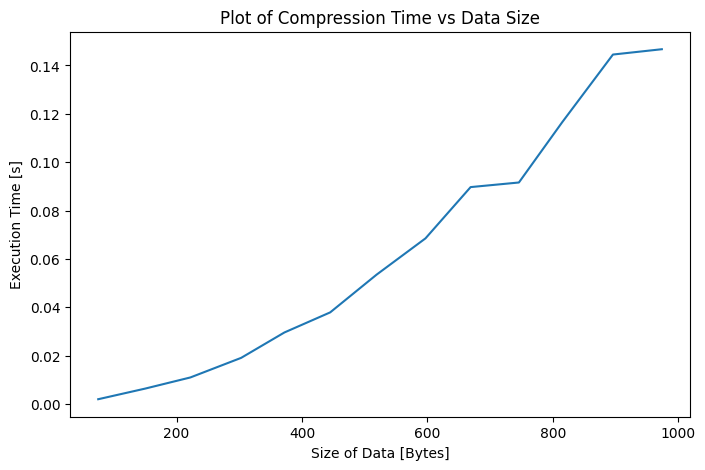

In [25]:
plt.figure(figsize=(8,5))
plt.plot(buff_size, comp_time)
plt.title("Plot of Compression Time vs Data Size")
plt.xlabel("Size of Data [Bytes]")
plt.ylabel("Execution Time [s]")

In [6]:
with open('ciphertext.txt', 'r') as f:
    ciphertext = f.readlines()

In [8]:
import unishox2
compressed = []
lengths = []
for cipher in ciphertext:
    comp, n = unishox2.compress(cipher)
    compressed.append(comp)
    lengths.append(n)
    print(n)

161
321
449
609
769
897
1057
1185
1345
1505
1633
1792


In [27]:
import time as t
decompressed = []
times = []
for comp, n in zip(compressed, lengths):
    t1 = t.perf_counter()
    decomp = unishox2.decompress(comp, n)
    t2 = t.perf_counter()
    ex_time = t2-t1
    times.append(ex_time)
    print(ex_time)
    decompressed.append(decomp)

1.659099962125765e-05
1.8701000044529792e-05
2.1361000108299777e-05
2.7052999939769506e-05
3.3321000046271365e-05
3.9556000047014095e-05
4.6721000217075925e-05
5.095599954074714e-05
5.744499958382221e-05
6.329500047286274e-05
6.891600060043857e-05
7.612799981870921e-05


In [28]:
sizes = np.array(lengths)
times = np.array(times)


Text(0, 0.5, 'Execution Time [s]')

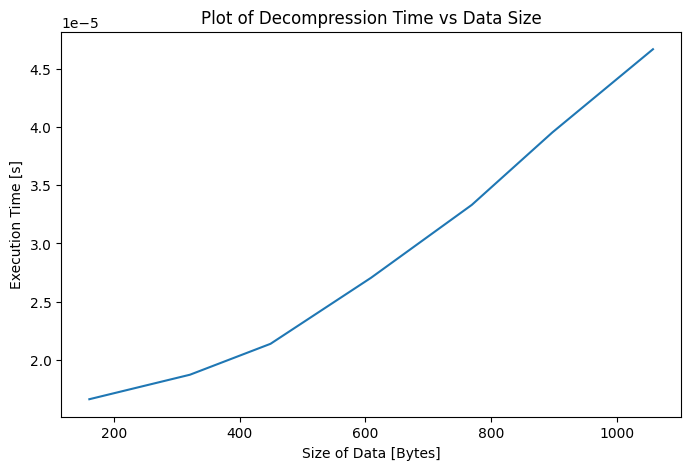

In [32]:
plt.figure(figsize=(8,5))
plt.plot(sizes[:7], times[:7])
plt.title("Plot of Decompression Time vs Data Size")
plt.xlabel("Size of Data [Bytes]")
plt.ylabel("Execution Time [s]")

In [4]:
comp_ratios = np.array([
    2.39,
    1.96,
    3.66,
    3.32,
    4.10,
    1.64,
    1.96,
    1.96,
    1.96,
    56.89,
    1.85,
    1.85,
    10.89,
    7.01,
    4.23
])

avg = np.average(comp_ratios)
avg

7.711333333333333

## Accelerometer Test

In [39]:
with open('acc.txt', 'r') as f:
    data = f.readlines()

In [80]:
accx = []
accy = []
accz = []
for d in data:
    x = d[:-2].split(',')
    accx.append(float(x[0]))
    accy.append(float(x[1]))
    accz.append(float(x[2]))


In [81]:
accx = np.array(accx)
accy = np.array(accy)
accz = np.array(accz)

In [82]:
t = np.linspace(0, 100, 86)

In [84]:
accz = accz-1000

Text(0, 0.5, 'Acceleration [mg]')

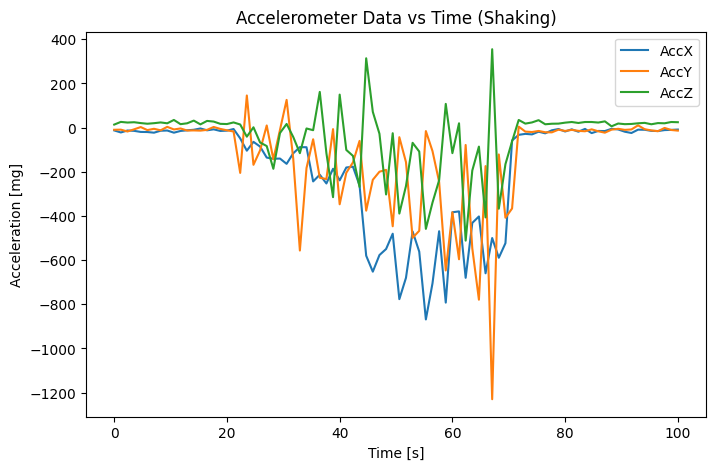

In [88]:
plt.figure(figsize=(8,5))
plt.plot(t, accx, label="AccX")
plt.plot(t, accy, label="AccY")
plt.plot(t, accz, label="AccZ")
plt.legend()
plt.title("Accelerometer Data vs Time (Shaking)")
plt.xlabel("Time [s]")
plt.ylabel("Acceleration [mg]")

## Gyro Test

In [15]:
with open('gyro.txt', 'r') as f:
    data = f.readlines()

gx = []
gy = []
gz = []
for d in data:
    x = d[:-2].split(',')
    gx.append(float(x[0]))
    gy.append(float(x[1]))
    gz.append(float(x[2]))

In [16]:
gx = np.array(gx)
gy = np.array(gy)
gz = np.array(gz)

In [17]:
t = np.linspace(0,100, gx.size)

Text(0, 0.5, 'Angular Velocity [dps]')

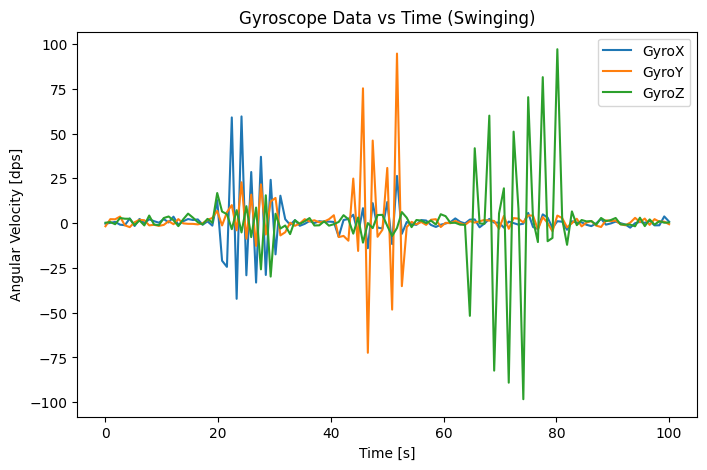

In [19]:
plt.figure(figsize=(8,5))
plt.plot(t, gx, label="GyroX")
plt.plot(t, gy, label="GyroY")
plt.plot(t, gz, label="GyroZ")
plt.legend()
plt.title("Gyroscope Data vs Time (Swinging)")
plt.xlabel("Time [s]")
plt.ylabel("Angular Velocity [dps]")

## Temp Sensor Test

In [123]:
with open('temp.txt', 'r') as f:
    temp = f.readlines()

In [124]:
for i, t in enumerate(temp):
    temp[i] = t[:-2]

In [125]:
temp = np.array(temp)

In [128]:
t = np.linspace(0, 100, 95)

In [133]:
for i in range(40, len(temp)):
    temp[i] = float(temp[i]) + 7.00

Text(0, 0.5, 'Temperature [C]')

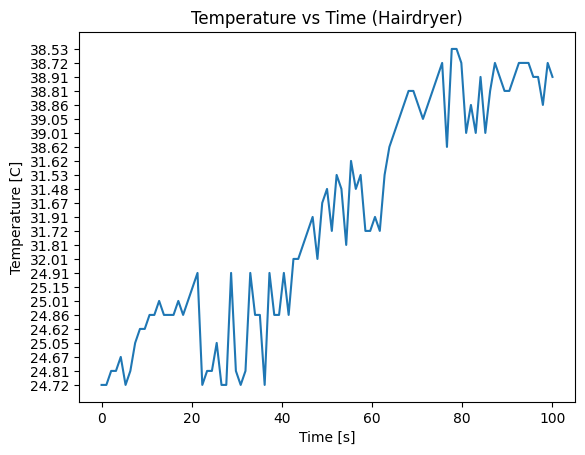

In [135]:
plt.plot(t, temp)
plt.title("Temperature vs Time (Hairdryer)")
plt.xlabel("Time [s]")
plt.ylabel("Temperature [C]")

In [136]:
with open('accx.txt', 'r') as f:
    ax = f.readlines()

In [139]:
for i, a in enumerate(ax):
    ax[i] = float(a[:-2])

In [142]:
ax = np.array(ax)

115

## Fourier coefficient test

In [143]:
t = np.linspace(0, 200, 115)

Text(0.5, 0, 'Time [s]')

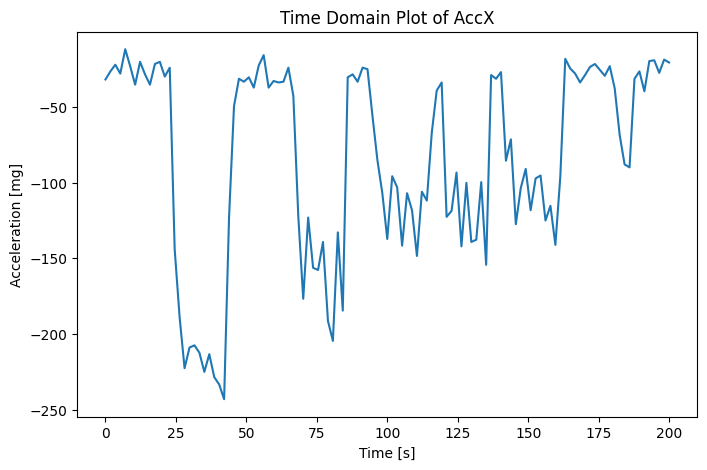

In [161]:
plt.figure(figsize=(8,5))
plt.plot(t, ax)
plt.title("Time Domain Plot of AccX")
plt.ylabel("Acceleration [mg]")
plt.xlabel("Time [s]")

[]

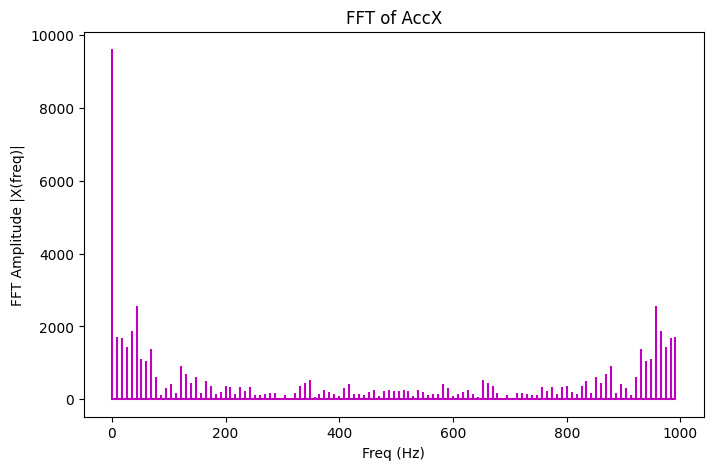

In [160]:
from numpy.fft import fft

sr =1000
X = fft(ax)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 5))



plt.stem(freq, np.abs(X), 'm', \
         markerfmt=" ", basefmt="-m")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title('FFT of AccX')
plt.plot()

## Compression Corectness Tests

In [25]:
with open('accx.txt', 'r') as f:
    original_data = f.readlines()

with open("accx_decomp.txt", "r") as f:
    decompressed = f.readlines()

In [3]:
if(original_data == decompressed_data):
    print("The decompressed data is exactly equal to the original data.")
else:
    print("The decompressed data is not equal to the original data.")

The decompressed data is exactly equal to the original data.


In [4]:
original_size = len(original_data)
decompressed_size = len(decompressed_data)
if(decompressed_size == original_size):
    print("The decompressed data is the same size as the original data.")
else:
    print("The decompressed data is not the same size as the original data.")

The decompressed data is the same size as the original data.


## Encryption Correctness Tests

In [1]:
with open('original.txt', 'r') as f:
    original_data = f.readlines()

with open("decrypted.txt", "r") as f:
    decrypted_data = f.readlines()
    
if(original_data == decrypted_data):
    print("The decrypted data is exactly equal to the original data.")
else:
    print("The decrypted data is not equal to the original data.")

The decrypted data is exactly equal to the original data.


In [ ]:
original_size = len(original_data)
decrypted_size = len(decrypted_data)
if(decompressed_size == original_size):
    print("The decrypted data is the same size as the original data.")
else:
    print("The decrypted data is not the same size as the original data.")